In [10]:
import matplotlib.pyplot as plt
import numpy as np
import math as math

In [11]:
def difference_finie_1D(a, b, n, f):
    
        h = 1.0/n
        alpha = np.empty(n,dtype=float)
        second_membre = np.empty(n,dtype=float)
        beta = np.empty(n,dtype=float)
        
        u_approchee = np.empty(n,dtype=float)

        second_membre[0] = f(h) * h**2 + a
        
        for i in range(1,n-1):
            second_membre[i] = f((i+1)*h)*h**2
        
        second_membre[n-1] = f(h*(n-1))*h**2 + b
        
        alpha[0] = 2
        
        beta[0] = second_membre[0]/alpha[0]
        
        for i in range(1,n):
            alpha[i] = 2-(1/alpha[i-1])
            beta[i] = (second_membre[i]+beta[i-1])/alpha[i]
        
        u_approchee[n-1] = beta[n-1]
        
        for i in range(n-2,-1,-1):
            u_approchee[i]=beta[i]+(u_approchee[i+1]/alpha[i])
        
        return u_approchee

In [23]:
def erreur(u_exacte, u_approche, n):
    
    erreur=[]
    
    err=np.linalg.norm(u_exacte - u_approche)/np.linalg.norm(u_exacte)
    
    for i in range(n):
        if (u_exacte[i] == 0.0):
            erreur.append(abs(u_exacte[i] - u_approche[i]))
        else:
            erreur.append(abs((u_exacte[i]-u_approche[i])/u_exacte[i]))
    return erreur, err

In [28]:
"""Fonction de test permet de réprésenter U approchée et U exacte sur le même graphe
 et représente aussi la courbe de l'évolution de l'erreur"""
def g_test(n, a, b, f, u):
    u_exacte=[]
    delta_x=1.0/n
    for i in range(1,n+1):
        u_exacte.append(u(i*delta_x))

    points_maillage=[]

    for i in range(1,n+1):
        points_maillage.append(i*delta_x)   

    u_approchee = difference_finie_1D(a, b, n, f)    


    """Représentation de U approchée et U réel sur un même graphe"""
    plt.figure(figsize=(10,6))
    plt.plot(points_maillage,u_approchee,"b:o",label = "u approchée")
    plt.plot(points_maillage,u_exacte,"r--",label = "u exacte")
    plt.legend(loc='best')
    plt.title("Représentation de u(x) sur l'intervalle [0;1]")
    plt.savefig("Représentation_u(x)=2.jpg")
    plt.xlabel("x")
    plt.ylabel("u(x)")
    plt.show()
    
    """Représentation de l'erreur sur le calcule de u approchée"""
    error_vec = erreur(u_exacte, u_approchee, n)
    print("Erreur")
    print(error_vec[1])
    
    plt.figure(figsize=(10,6))
    
    plt.plot(points_maillage,error_vec[0],"g", label ="erreur")
    
    plt.legend(loc="best")
    plt.title("Représentation de l'erreur sur u")
    plt.savefig("Représentation_erreur.jpg")
    plt.xlabel("xi")
    plt.ylabel("erreur")
    plt.show()

In [25]:
"""Coube de l'erreur en faisant varier le maillage, Pour chaque maillage pris on considérera
 l'erreur maximale sur les Ui approchées """
def courbe_erreur_maillage(min_h, max_h, a, b, f, u):
    
    erreur_max = []
    
    for h in range(min_h,max_h):
        u_exacte=[]
        points_maillage=[]
        u_approchee=[]
        
        delta_x=1/h
        
        for i in range(1,h+1):
            u_exacte.append(u(i*delta_x))        

        for i in range(1,h+1):
            points_maillage.append(i*delta_x)

        u_approchee=difference_finie_1D(a, b, h, f)
        
        erreur_max.append(max(erreur(u_exacte, u_approchee, h)[0]))
        
    
    plt.figure(figsize=(10,6))
    absc = [i for i in range(min_h,max_h)]
    
    plt.plot([i for i in range(min_h,max_h)],erreur_max,"g", label ="erreur_max")
    
    plt.legend(loc="best")
    plt.title("Représentation de l'erreur variation de n")
    plt.savefig("Représentation_erreur_variant_n.jpg")
    plt.xlabel("n")
    plt.ylabel("erreur_max")
    plt.show()
    
    """me permet de donner l'ordre numérique de convergence"""
    plt.plot(np.log(absc), np.log(erreur_max))
    plt.show()
    
    print("Vitesse de convergence")
    print(np.polyfit(np.log(absc), np.log(erreur_max), 1)[0])

In [26]:
def tracer(n, n_min, n_max, f, u):
    g_test(n, u(0), u(1), f, u)
    courbe_erreur_maillage(n_min,n_max, u(0), u(1), f, u)

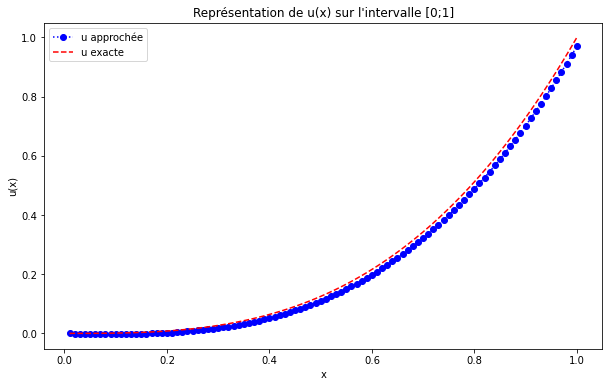

Erreur
0.04536679531139942


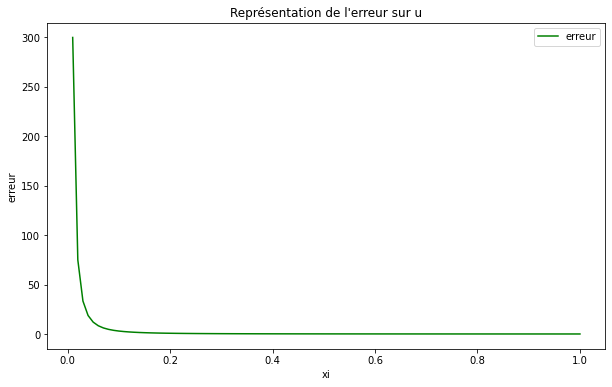

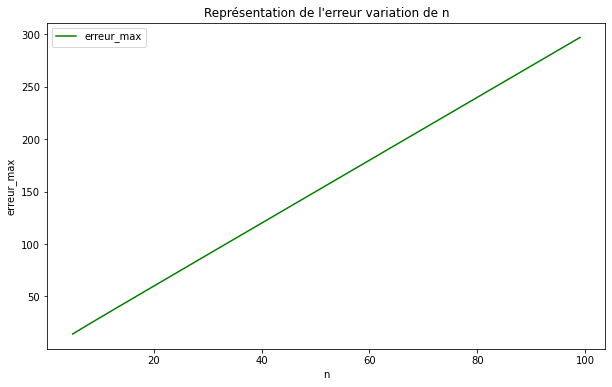

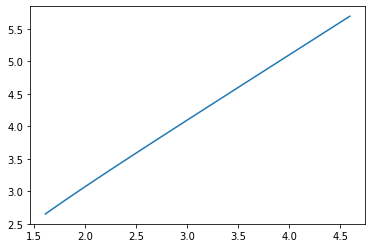

Vitesse de convergence
1.0087066808594771


In [35]:
def u(x):
    return x**3

def f(x):
    return -6*x

tracer(100, 5, 100, f, u)

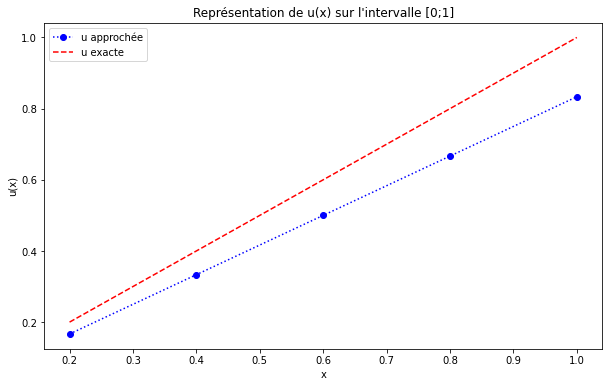

Erreur
0.1666666666666668


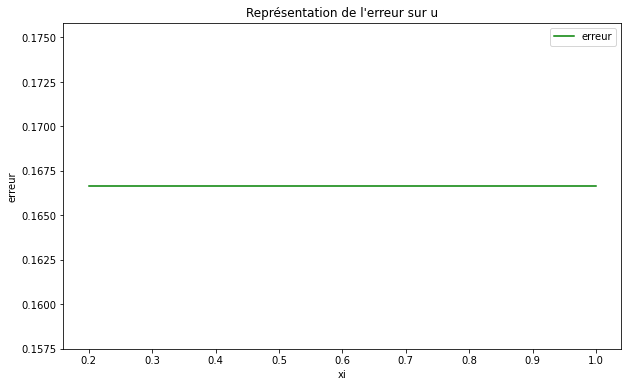

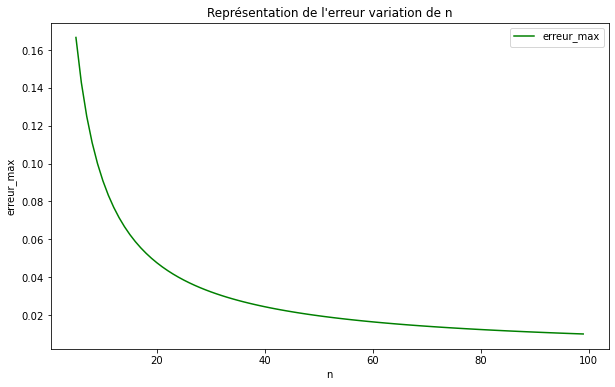

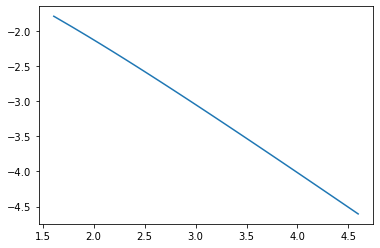

Vitesse de convergence
-0.9596020390604797


In [17]:
def u(x):
    return x

def f(x):
    return 0

tracer(5, 5, 100, f, u)

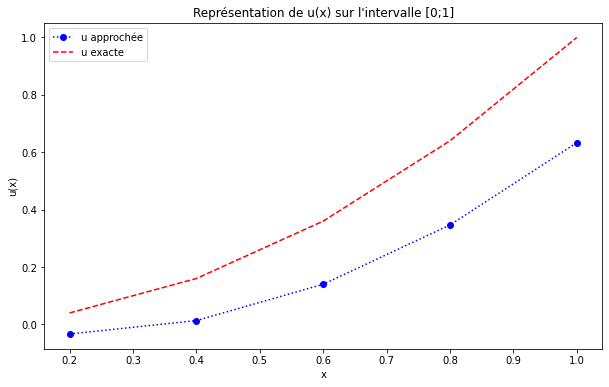

Erreur
1.8333333333333344


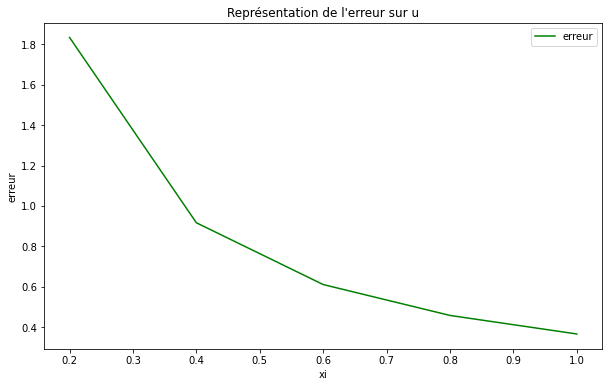

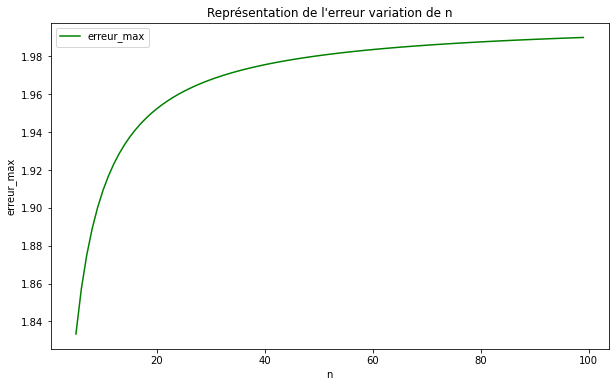

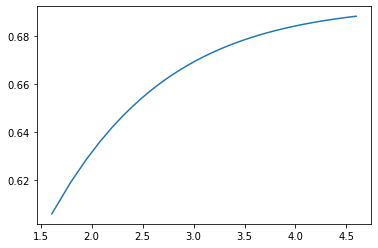

Vitesse de convergence
0.019558192121097957


In [18]:
def u(x):
    return x**2

def f(x):
    return -2

tracer(5, 5, 100, f, u)